* 데이터출처 : 서울 열린데이터광장

* 서울시 버스노선별 정류장별 시간대별 승하차 인원 정보 : http://data.seoul.go.kr/dataList/OA-12913/S/1/datasetView.do
* 서울시 지하철 호선별 역별 시간대별 승하차 인원 정보 :http://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

In [3]:
raw = pd.read_csv("data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv", encoding="cp949")
raw.shape

(45945, 52)

In [4]:
raw.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202107,1호선,동대문,665,13,13154,2112,8755,6552,13558,...,7234,7,1394,0,0,0,1,0,0,20210803
1,202107,1호선,동묘앞,92,0,3197,1077,3575,4910,5452,...,1955,3,1039,0,0,0,0,0,0,20210803
2,202107,1호선,서울역,654,6,8652,6342,11542,33836,34033,...,5824,29,551,0,0,0,0,0,0,20210803
3,202107,1호선,시청,13,0,1803,4616,2797,19665,6210,...,988,6,84,0,0,0,0,0,0,20210803
4,202107,1호선,신설동,295,14,7940,3120,7834,10994,15927,...,4104,21,437,1,0,0,0,0,0,20210803


In [5]:
raw.tail()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
45940,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
45941,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
45942,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
45943,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223
45944,201501,중앙선,회기,436,3,10929,3067,23317,10430,65043,...,35702,767,9314,0,0,0,0,0,0,20151223


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45945 entries, 0 to 45944
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           45945 non-null  int64 
 1   호선명           45945 non-null  object
 2   지하철역          45945 non-null  object
 3   04시-05시 승차인원  45945 non-null  int64 
 4   04시-05시 하차인원  45945 non-null  int64 
 5   05시-06시 승차인원  45945 non-null  int64 
 6   05시-06시 하차인원  45945 non-null  int64 
 7   06시-07시 승차인원  45945 non-null  int64 
 8   06시-07시 하차인원  45945 non-null  int64 
 9   07시-08시 승차인원  45945 non-null  int64 
 10  07시-08시 하차인원  45945 non-null  int64 
 11  08시-09시 승차인원  45945 non-null  int64 
 12  08시-09시 하차인원  45945 non-null  int64 
 13  09시-10시 승차인원  45945 non-null  int64 
 14  09시-10시 하차인원  45945 non-null  int64 
 15  10시-11시 승차인원  45945 non-null  int64 
 16  10시-11시 하차인원  45945 non-null  int64 
 17  11시-12시 승차인원  45945 non-null  int64 
 18  11시-12시 하차인원  45945 non-null  int64 
 19  12시-

## tidy data
* melt

In [7]:
df = raw.melt(id_vars=["사용월", "호선명", "지하철역"], var_name="시간승하차", value_name="인원수")
df.head()

,사용월,호선명,지하철역,시간승하차,인원수
0,202107,1호선,동대문,04시-05시 승차인원,665
1,202107,1호선,동묘앞,04시-05시 승차인원,92
2,202107,1호선,서울역,04시-05시 승차인원,654
3,202107,1호선,시청,04시-05시 승차인원,13
4,202107,1호선,신설동,04시-05시 승차인원,295


In [8]:
df["호선명"].unique()

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선', '9호선2단계'],
      dtype=object)

In [9]:
df["시간승하차"].unique()

array(['04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원', '05시-06시 하차인원',
       '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원', '07시-08시 하차인원',
       '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원', '09시-10시 하차인원',
       '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원', '11시-12시 하차인원',
       '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원', '13시-14시 하차인원',
       '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원', '15시-16시 하차인원',
       '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원', '17시-18시 하차인원',
       '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원', '19시-20시 하차인원',
       '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원', '21시-22시 하차인원',
       '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원', '23시-24시 하차인원',
       '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원', '01시-02시 하차인원',
       '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원', '03시-04시 하차인원',
       '작업일자'], dtype=object)

In [10]:
print(df.shape)
df = df[df["시간승하차"] != "작업일자"].copy()
print(df.shape)

(2251305, 5)
(2205360, 5)


In [11]:
df.describe()

,사용월,인원수
count,2.205360e+06,2.205360e+06
mean,2.017933e+05,1.490138e+04
std,1.902518e+02,2.396117e+04
min,2.015010e+05,0.000000e+00
25%,2.016090e+05,1.086000e+03
50%,2.018050e+05,7.182000e+03
75%,2.019120e+05,1.872200e+04
max,2.021070e+05,4.654060e+05


In [12]:
df.describe(include="object")

,호선명,지하철역,시간승하차
count,2205360,2205360,2205360
unique,26,579,48
top,5호선,서울역,04시-05시 승차인원
freq,195264,20832,45945


## 파생변수 만들기
### 문자열 나누기

In [13]:
df["시간"] = df["시간승하차"].str.split(expand=True)[0]
df["승하차"] = df["시간승하차"].str.split(expand=True)[1]
df.head(1)

,사용월,호선명,지하철역,시간승하차,인원수,시간,승하차
0,202107,1호선,동대문,04시-05시 승차인원,665,04시-05시,승차인원


### 출퇴근 시간 변수 만들기

In [14]:
df["시간대"] = df["시간"].str[:2].astype(int)
df["시간대"]

0          4
1          4
2          4
3          4
4          4
          ..
2205355    3
2205356    3
2205357    3
2205358    3
2205359    3
Name: 시간대, Length: 2205360, dtype: int64

In [15]:
df.loc[(df["시간대"] >= 7) & (df["시간대"] <= 10), "출퇴근"] = "출근"
df.loc[(df["시간대"] >= 17) & (df["시간대"] <= 21), "출퇴근"] = "퇴근"
df.head()

,사용월,호선명,지하철역,시간승하차,인원수,시간,승하차,시간대,출퇴근
0,202107,1호선,동대문,04시-05시 승차인원,665,04시-05시,승차인원,4,NaN
1,202107,1호선,동묘앞,04시-05시 승차인원,92,04시-05시,승차인원,4,NaN
2,202107,1호선,서울역,04시-05시 승차인원,654,04시-05시,승차인원,4,NaN
3,202107,1호선,시청,04시-05시 승차인원,13,04시-05시,승차인원,4,NaN
4,202107,1호선,신설동,04시-05시 승차인원,295,04시-05시,승차인원,4,NaN


### 문자열 대체
* 승차인원 => 승차
* 하차인원 => 하차
* "인원" 텍스트 제거

In [16]:
df["승하차"] = df["승하차"].str.replace("인원", "")
df.head(1)

,사용월,호선명,지하철역,시간승하차,인원수,시간,승하차,시간대,출퇴근
0,202107,1호선,동대문,04시-05시 승차인원,665,04시-05시,승차,4,NaN


### 문자열 슬라이싱
* "연도월" 형태의 데이터를 특정 인덱스를 기준으로 슬라이싱

In [17]:
df["연도"] = df["사용월"].astype(str).str[:4]
df["월"] = df["사용월"].astype(str).str[4:]
df.head(1)

,사용월,호선명,지하철역,시간승하차,인원수,시간,승하차,시간대,출퇴근,연도,월
0,202107,1호선,동대문,04시-05시 승차인원,665,04시-05시,승차,4,NaN,2021,07


Text(0.5, 1.0, '연도별 합계 인원')

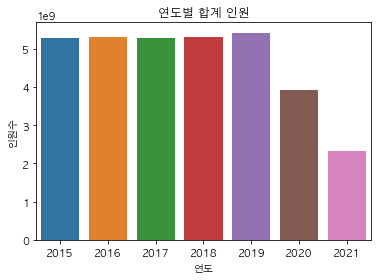

In [18]:
sns.barplot(data=df.sort_values("연도"), x="연도", y="인원수", ci=None, estimator=np.sum)
plt.title("연도별 합계 인원")

## 코로나 이전 이후 비교
### 특정 연도 추출

In [19]:
df_192021 = df[df["연도"].isin(["2019", "2020", "2021"])]
df.shape, df_192021.shape

((2205360, 11), (893424, 11))

### 연도별 합계 인원

Text(0.5, 1.0, '연도별 합계 인원')

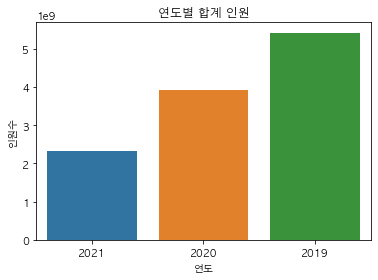

In [20]:
sns.barplot(data=df_192021, x="연도", y="인원수", ci=None, estimator=np.sum)
plt.title("연도별 합계 인원")

### 호선별 합계 인원

Text(0.5, 1.0, '호선별 합계 인원')

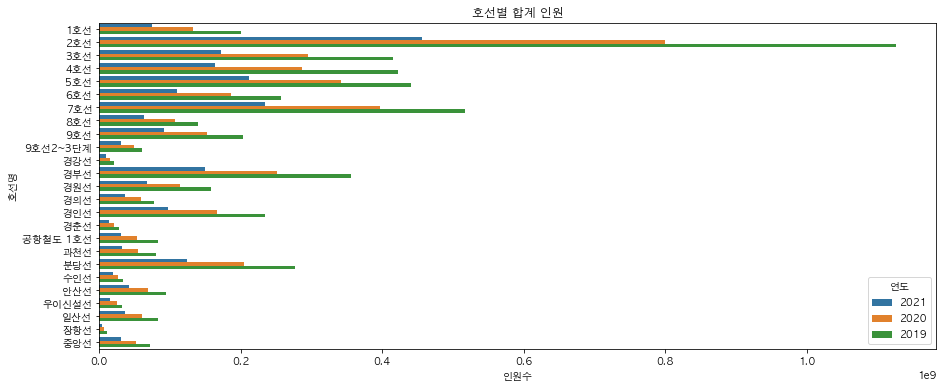

In [21]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df_192021, x="인원수", y="호선명", ci=None, estimator=np.sum, hue="연도")
plt.title("호선별 합계 인원")

In [22]:
df_line_year = df.groupby(["호선명", "연도"])["인원수"].sum().unstack()
df_line_year.style.background_gradient().format("{:,.0f}")

연도,2015,2016,2017,2018,2019,2020,2021
호선명,,,,,,,
1호선,"209,611,322","209,253,173","199,479,727","196,615,316","200,161,236","132,923,921","73,905,493"
2호선,"1,136,532,805","1,130,426,567","1,113,126,253","1,120,273,637","1,127,099,473","799,725,099","455,580,964"
3호선,"407,149,170","407,299,680","406,715,836","409,099,330","415,110,584","295,542,443","172,127,089"
4호선,"447,917,398","448,404,612","433,640,491","421,192,109","422,059,263","287,173,824","162,916,799"
5호선,"432,004,257","432,061,470","430,795,143","434,307,063","440,703,923","341,842,285","212,279,967"
6호선,"252,985,992","254,863,612","255,195,824","255,959,341","257,362,720","186,709,725","109,375,593"
7호선,"525,502,631","520,579,948","510,012,555","510,947,444","516,694,675","396,263,946","233,771,820"
8호선,"119,346,230","122,631,543","128,751,279","134,434,784","139,411,556","107,526,283","63,689,564"
9호선,"186,857,064","189,045,279","191,462,937","193,572,786","203,031,073","152,781,668","92,076,430"


## 월별 승하차 인원

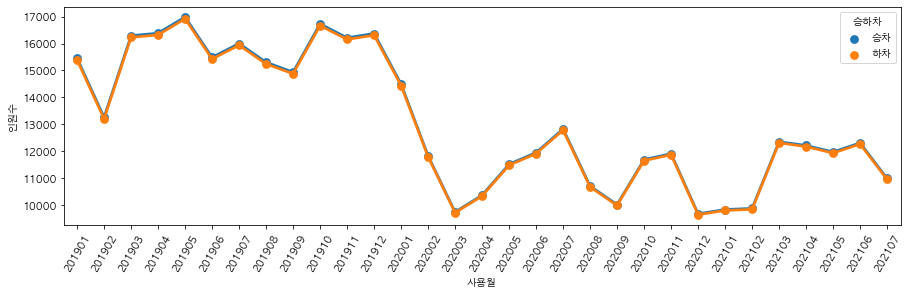

In [23]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
sns.pointplot(data=df_192021, x="사용월", y="인원수", hue="승하차", ci=None)

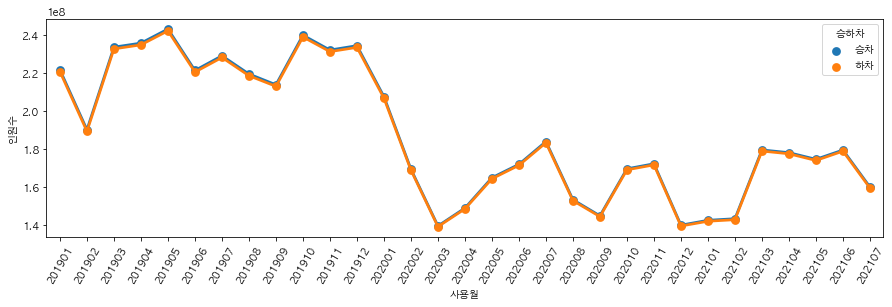

In [24]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=60)
sns.pointplot(data=df_192021, x="사용월", y="인원수", hue="승하차", ci=None, estimator=np.sum)

## 호선별 인원

Text(0.5, 1.0, '호선별 평균 인원')

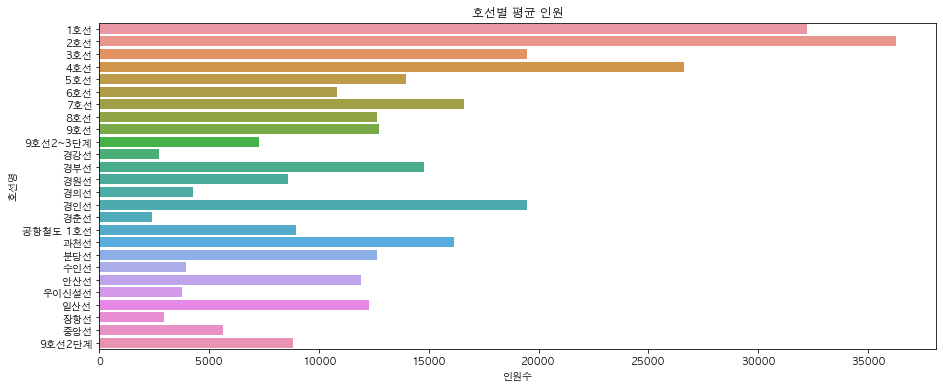

In [25]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x="인원수", y="호선명", ci=None)
plt.title("호선별 평균 인원")

Text(0.5, 1.0, '호선별 합계 인원')

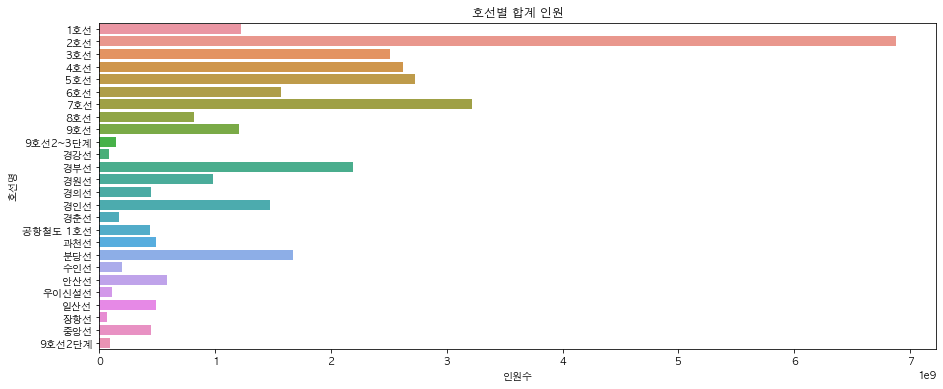

In [26]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x="인원수", y="호선명", ci=None, estimator=sum)
plt.title("호선별 합계 인원")

Text(0.5, 1.0, '호선별 합계 인원')

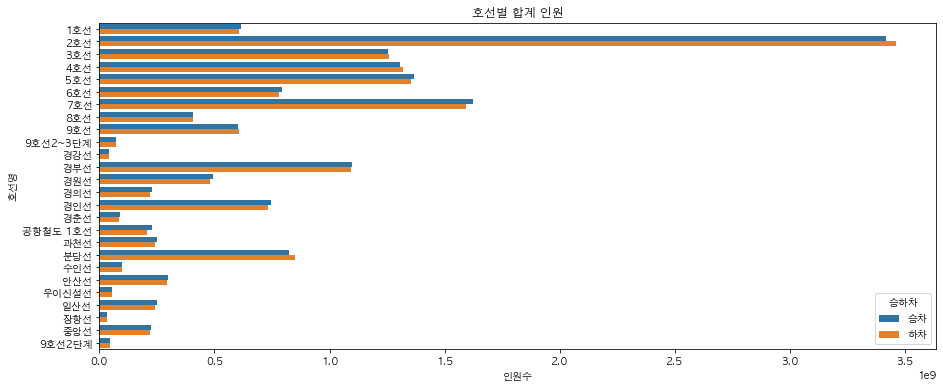

In [27]:
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x="인원수", y="호선명", ci=None, estimator=sum, hue="승하차")
plt.title("호선별 합계 인원")

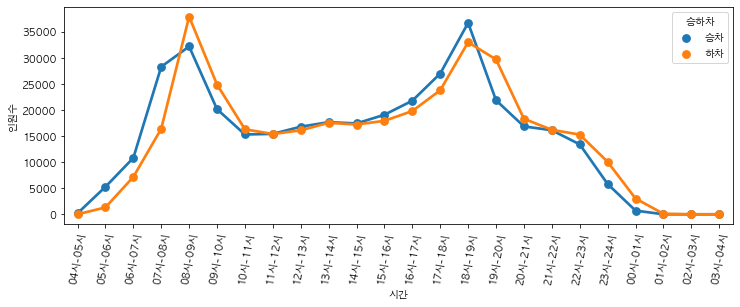

In [28]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=80)
sns.pointplot(data=df, x="시간", y="인원수", ci=None, hue="승하차")

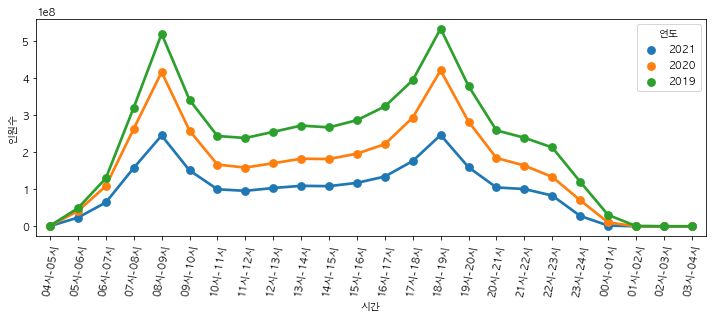

In [29]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=80)
sns.pointplot(data=df_192021, x="시간", y="인원수", ci=None, hue="연도", estimator=np.sum)

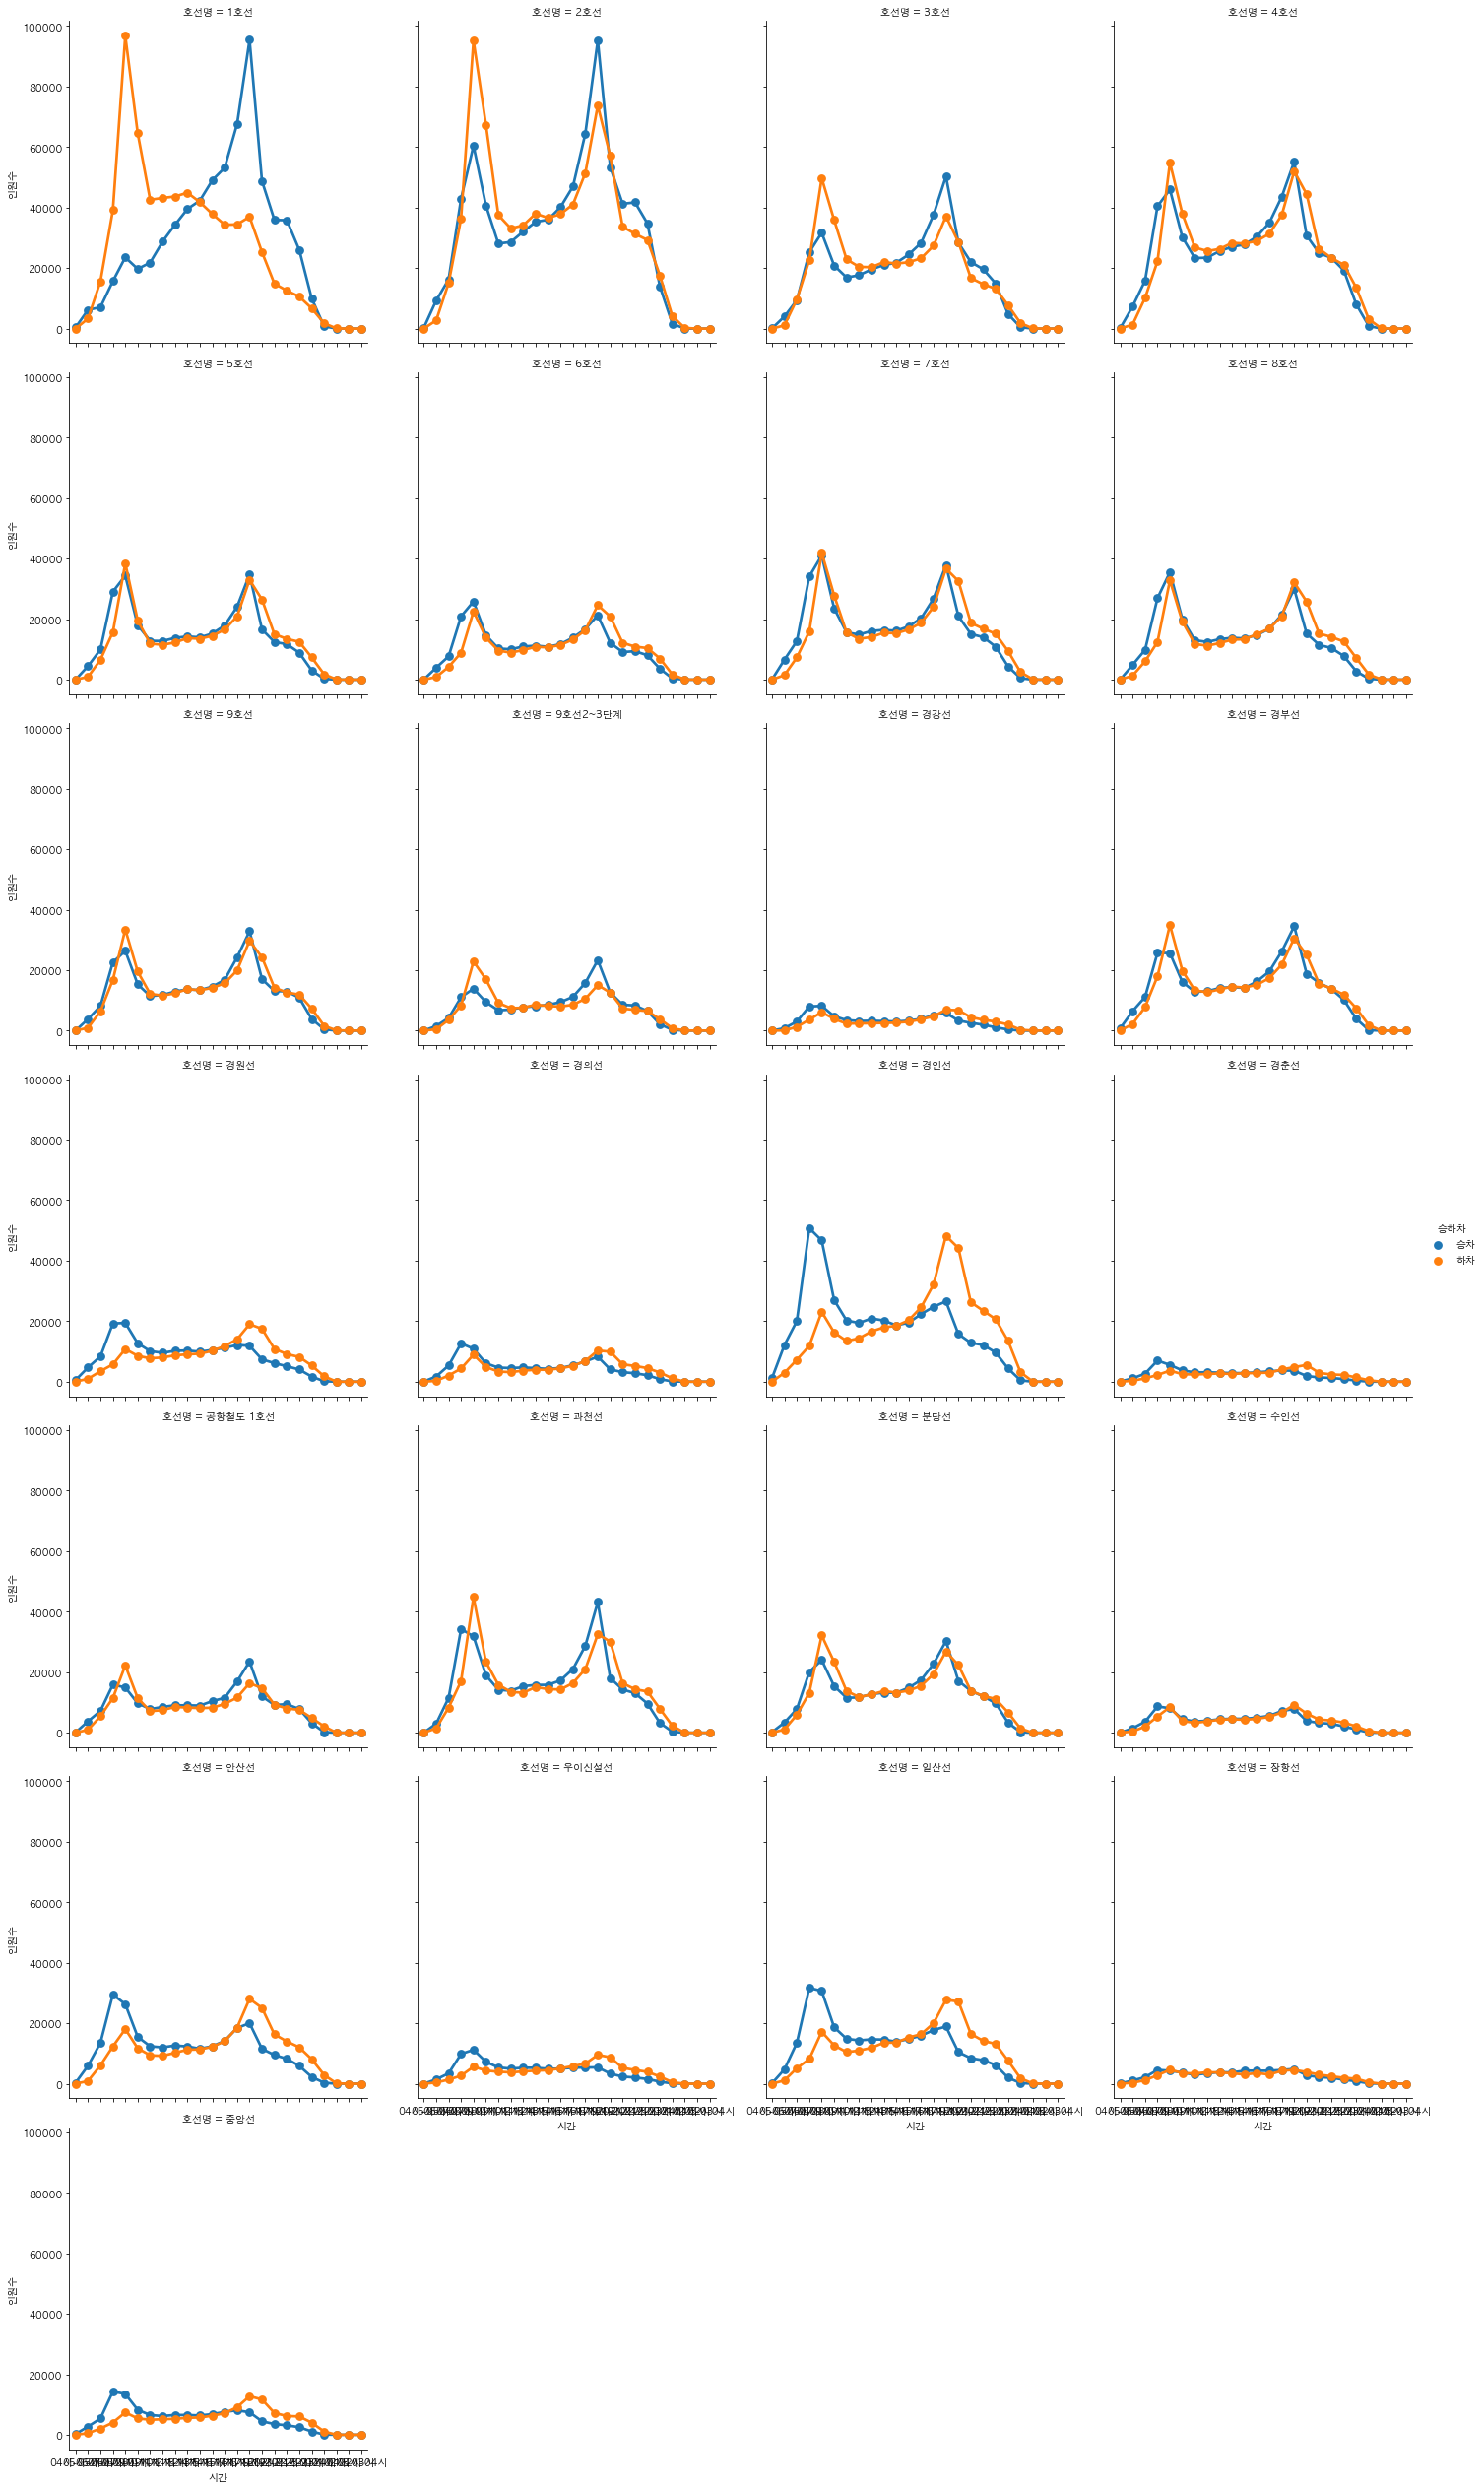

In [30]:
sns.catplot(data=df_192021, x="시간", y="인원수", kind="point",
            ci=None, hue="승하차", col="호선명", col_wrap=4)

## 승하차 인원

In [31]:
df_192021[df_192021["승하차"] == "하차"].sort_values(by=["인원수", "지하철역"], ascending=False).head(20)

,사용월,호선명,지하철역,시간승하차,인원수,시간,승하차,시간대,출퇴근,연도,월
428143,201907,7호선,가산디지털단지,08시-09시 하차인원,456549,08시-09시,하차,8,출근,2019,07
431729,201901,7호선,가산디지털단지,08시-09시 하차인원,449728,08시-09시,하차,8,출근,2019,01
429933,201904,7호선,가산디지털단지,08시-09시 하차인원,443474,08시-09시,하차,8,출근,2019,04
519834,201907,2호선,강남,09시-10시 하차인원,439572,09시-10시,하차,9,출근,2019,07
429336,201905,7호선,가산디지털단지,08시-09시 하차인원,426188,08시-09시,하차,8,출근,2019,05
523420,201901,2호선,강남,09시-10시 하차인원,420878,09시-10시,하차,9,출근,2019,01
427977,201907,2호선,역삼,08시-09시 하차인원,416599,08시-09시,하차,8,출근,2019,07
426350,201910,7호선,가산디지털단지,08시-09시 하차인원,412238,08시-09시,하차,8,출근,2019,10
420972,202007,7호선,가산디지털단지,08시-09시 하차인원,410689,08시-09시,하차,8,출근,2020,07
414327,202106,7호선,가산디지털단지,08시-09시 하차인원,409884,08시-09시,하차,8,출근,2021,06


In [32]:
df_192021[df_192021["승하차"] == "승차"].sort_values(by=["인원수", "지하철역"], ascending=False).head(20)

,사용월,호선명,지하철역,시간승하차,인원수,시간,승하차,시간대,출퇴근,연도,월
1300899,201907,2호선,강남,18시-19시 승차인원,448390,18시-19시,승차,18,퇴근,2019,07
1304485,201901,2호선,강남,18시-19시 승차인원,431115,18시-19시,승차,18,퇴근,2019,01
1300301,201908,2호선,강남,18시-19시 승차인원,409350,18시-19시,승차,18,퇴근,2019,08
1302092,201905,2호선,강남,18시-19시 승차인원,407478,18시-19시,승차,18,퇴근,2019,05
1302689,201904,2호선,강남,18시-19시 승차인원,401901,18시-19시,승차,18,퇴근,2019,04
1299106,201910,2호선,강남,18시-19시 승차인원,396172,18시-19시,승차,18,퇴근,2019,10
1293727,202007,2호선,강남,18시-19시 승차인원,391365,18시-19시,승차,18,퇴근,2020,07
1303289,201903,2호선,강남,18시-19시 승차인원,388964,18시-19시,승차,18,퇴근,2019,03
1298509,201911,2호선,강남,18시-19시 승차인원,387701,18시-19시,승차,18,퇴근,2019,11
1297912,201912,2호선,강남,18시-19시 승차인원,386600,18시-19시,승차,18,퇴근,2019,12


## 출퇴근 시간 승하차 빈도수

In [45]:
df_station = df_192021.groupby(by=["지하철역", "승하차", "시간", "출퇴근"])["인원수"].sum().reset_index()
df_station

,지하철역,승하차,시간,출퇴근,인원수
0,4.19민주묘지,승차,07시-08시,출근,222508
1,4.19민주묘지,승차,08시-09시,출근,255691
2,4.19민주묘지,승차,09시-10시,출근,178470
3,4.19민주묘지,승차,10시-11시,출근,141904
4,4.19민주묘지,승차,17시-18시,퇴근,186827
...,...,...,...,...,...
9445,흑석(중앙대입구),하차,17시-18시,퇴근,549993
9446,흑석(중앙대입구),하차,18시-19시,퇴근,810559
9447,흑석(중앙대입구),하차,19시-20시,퇴근,614598
9448,흑석(중앙대입구),하차,20시-21시,퇴근,395677


In [46]:
df_station[df_station["승하차"] == "하차"].sort_values("인원수", ascending=False).head(20)

,지하철역,승하차,시간,출퇴근,인원수
64,가산디지털단지,하차,08시-09시,출근,16552762
4726,선릉,하차,08시-09시,출근,12664708
5338,시청,하차,08시-09시,출근,11662788
6418,여의도,하차,08시-09시,출근,10872974
4582,서울역,하차,08시-09시,출근,10702900
209,강남,하차,09시-10시,출근,10275230
6472,역삼,하차,08시-09시,출근,10097811
208,강남,하차,08시-09시,출근,9992026
4132,삼성(무역센터),하차,08시-09시,출근,9789354
7300,을지로입구,하차,08시-09시,출근,9226384


In [39]:
df_station[
    (df_station["승하차"] == "승차") & (df_station["출퇴근"] == "출근")
].sort_values("인원수", ascending=False).head(20)

,지하철역,승하차,시간,출퇴근,인원수
5563,신림,승차,08시-09시,출근,9595580
5562,신림,승차,07시-08시,출근,6416077
5564,신림,승차,09시-10시,출근,5749561
3961,사당,승차,08시-09시,출근,5736288
955,구로디지털단지,승차,08시-09시,출근,5645485
4537,서울대입구(관악구청),승차,08시-09시,출근,5610573
7651,잠실(송파구청),승차,08시-09시,출근,5391017
6517,연신내,승차,08시-09시,출근,5000714
1441,까치산,승차,08시-09시,출근,4741768
5527,신도림,승차,08시-09시,출근,4652484


In [40]:
df_station[
    (df_station["승하차"] == "하차") & (df_station["출퇴근"] == "출근")
].sort_values("인원수", ascending=False).head(20)

,지하철역,승하차,시간,출퇴근,인원수
64,가산디지털단지,하차,08시-09시,출근,16552762
4726,선릉,하차,08시-09시,출근,12664708
5338,시청,하차,08시-09시,출근,11662788
6418,여의도,하차,08시-09시,출근,10872974
4582,서울역,하차,08시-09시,출근,10702900
209,강남,하차,09시-10시,출근,10275230
6472,역삼,하차,08시-09시,출근,10097811
208,강남,하차,08시-09시,출근,9992026
4132,삼성(무역센터),하차,08시-09시,출근,9789354
7300,을지로입구,하차,08시-09시,출근,9226384


In [43]:
df_station[
    (df_station["승하차"] == "승차") & (df_station["출퇴근"] == "퇴근")
].sort_values("인원수", ascending=False).head(20)

,지하철역,승하차,시간,출퇴근,인원수
59,가산디지털단지,승차,18시-19시,퇴근,13102765
4721,선릉,승차,18시-19시,퇴근,10892512
203,강남,승차,18시-19시,퇴근,10834436
4577,서울역,승차,18시-19시,퇴근,10401026
5333,시청,승차,18시-19시,퇴근,9513997
6413,여의도,승차,18시-19시,퇴근,9269844
4127,삼성(무역센터),승차,18시-19시,퇴근,8952595
7655,잠실(송파구청),승차,18시-19시,퇴근,8870022
6467,역삼,승차,18시-19시,퇴근,8367627
7295,을지로입구,승차,18시-19시,퇴근,7941121


In [44]:
df_station[
    (df_station["승하차"] == "하차") & (df_station["출퇴근"] == "퇴근")
].sort_values("인원수", ascending=False).head(20)

,지하철역,승하차,시간,출퇴근,인원수
7664,잠실(송파구청),하차,18시-19시,퇴근,7834326
9230,홍대입구,하차,18시-19시,퇴근,7642159
3974,사당,하차,18시-19시,퇴근,7559822
5576,신림,하차,18시-19시,퇴근,7530655
5577,신림,하차,19시-20시,퇴근,7099676
212,강남,하차,18시-19시,퇴근,6462445
464,건대입구,하차,18시-19시,퇴근,6226169
644,고속터미널,하차,18시-19시,퇴근,6047413
9229,홍대입구,하차,17시-18시,퇴근,5935662
9231,홍대입구,하차,19시-20시,퇴근,5851303
